In [120]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
%matplotlib inline

np.random.seed(123)

# Dataset info
Human Activity Recognition database built from the recordings of 30 subjects performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually.

In [121]:
Data1 = pd.read_csv('train.csv') 

In [122]:
Data1.tail(10)

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
3599,10262,WALKING_UPSTAIRS,0.260,-0.03080,-0.0957,-0.3110,-0.1920,-0.254,-0.402,-0.2250,...,0.1190,-0.0312,-0.4030,0.2030,0.9010,-0.936,0.4900,-0.693,0.255,0.165
3600,10264,WALKING_UPSTAIRS,0.364,-0.06570,-0.0854,-0.3590,-0.1130,-0.318,-0.405,-0.1860,...,0.2070,-0.3730,-0.7490,-0.4750,-0.0585,-0.948,0.7880,-0.683,0.272,0.153
3601,10265,WALKING_UPSTAIRS,0.315,0.02320,-0.1440,-0.3100,-0.1580,-0.326,-0.379,-0.2140,...,0.2300,-0.5230,-0.8440,-0.0873,-0.5530,-0.830,0.7010,-0.666,0.288,0.151
3602,10268,WALKING_UPSTAIRS,0.302,0.00926,-0.1630,-0.3310,-0.0371,-0.245,-0.391,-0.0685,...,-0.1350,-0.3180,-0.6800,-0.1370,0.8100,0.932,0.3550,-0.659,0.274,0.178
3603,10274,WALKING_UPSTAIRS,0.144,-0.03990,-0.0451,-0.3550,-0.0158,-0.233,-0.465,-0.0364,...,-0.1440,-0.3750,-0.7800,0.5560,-0.2060,-0.944,0.2980,-0.661,0.271,0.180
3604,10277,WALKING_UPSTAIRS,0.357,-0.04460,-0.1300,-0.3140,-0.0556,-0.173,-0.386,-0.0575,...,0.0168,-0.1630,-0.5930,-0.7110,-0.0612,-0.706,0.0646,-0.660,0.274,0.176
3605,10278,WALKING_UPSTAIRS,0.344,0.00479,-0.1220,-0.3200,-0.0667,-0.182,-0.380,-0.0710,...,-0.0292,0.1810,-0.2500,-0.4030,-0.7060,0.739,0.8710,-0.653,0.278,0.180
3606,10279,WALKING_UPSTAIRS,0.284,-0.00796,-0.1190,-0.3090,-0.0804,-0.211,-0.369,-0.0971,...,-0.1100,0.0245,-0.3930,-0.0761,-0.2390,0.960,0.0866,-0.657,0.272,0.183
3607,10280,WALKING_UPSTAIRS,0.207,0.02460,-0.1040,-0.3650,-0.1690,-0.216,-0.449,-0.1860,...,-0.2140,-0.3520,-0.7340,0.5350,-0.2570,0.927,-0.0843,-0.657,0.267,0.188
3608,10281,WALKING_DOWNSTAIRS,0.393,-0.01780,-0.0902,-0.0963,-0.1740,-0.257,-0.153,-0.2080,...,0.0894,0.2740,-0.0368,-0.7430,-0.0802,0.927,-0.6520,-0.807,0.190,0.118


In [123]:
Data1.shape

(3609, 563)

In [124]:
#save labels as string
Labels = Data1['activity']
Data = Data1.drop(['rn', 'activity'], axis = 1)
Labels_keys = Labels.unique().tolist()
Labels = np.array(Labels)
print('Activity labels: ' + str(Labels_keys))

Activity labels: ['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']


In [125]:
#check for missing values
Temp = pd.DataFrame(Data.isnull().sum())
Temp.columns = ['Sum']
print('Amount of rows with missing values: ' + str(len(Temp.index[Temp['Sum'] > 0])) )

Amount of rows with missing values: 0


In [126]:
#normalize the dataset
scaler = StandardScaler()
Data_norm = scaler.fit_transform(Data)

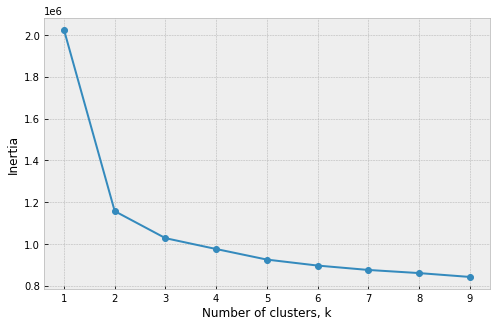

In [127]:
#check the optimal k value
ks = range(1, 10)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(Data_norm)
    inertias.append(model.inertia_)

plt.figure(figsize=(8,5))
plt.style.use('bmh')
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()

The best value for k("elbow" of the line) is 2 (two clusters).

In [128]:
def k_means(n_clust, data_frame, true_labels):
    """
    Function k_means applies k-means clustering alrorithm on dataset and prints the crosstab of cluster and actual labels 
    and clustering performance parameters.
    
    Input:
    n_clust - number of clusters (k value)
    data_frame - dataset we want to cluster
    true_labels - original labels
    
    Output:
    1 - crosstab of cluster and actual labels
    2 - performance table
    """
    k_means = KMeans(n_clusters = n_clust, random_state=123, n_init=30)
    k_means.fit(data_frame)
    c_labels = k_means.labels_
    df = pd.DataFrame({'clust_label': c_labels, 'orig_label': true_labels.tolist()})
    ct = pd.crosstab(df['clust_label'], df['orig_label'])
    y_clust = k_means.predict(data_frame)
    display(ct)
    print('% 9s' % 'inertia  homo    compl   v-meas   ARI     AMI     silhouette')
    print('%i   %.3f   %.3f   %.3f   %.3f   %.3f    %.3f'
      %(k_means.inertia_,
      homogeneity_score(true_labels, y_clust),
      completeness_score(true_labels, y_clust),
      v_measure_score(true_labels, y_clust),
      adjusted_rand_score(true_labels, y_clust),
      adjusted_mutual_info_score(true_labels, y_clust),
      silhouette_score(data_frame, y_clust, metric='euclidean')))

In [129]:
k_means(n_clust=2, data_frame=Data_norm, true_labels=Labels)

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,680,622,668,0,0,6
1,1,1,0,603,493,535


inertia  homo    compl   v-meas   ARI     AMI     silhouette
1156484   0.378   0.981   0.546   0.329   0.546    0.390


In [130]:
k_means(n_clust=6, data_frame=Data_norm, true_labels=Labels)

orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,554,24,0,0,0,0
1,0,0,0,248,311,97
2,1,0,0,329,107,438
3,106,157,188,0,0,2
4,0,0,0,26,75,4
5,20,442,480,0,0,0


inertia  homo    compl   v-meas   ARI     AMI     silhouette
895968   0.547   0.588   0.566   0.429   0.566    0.112


In [131]:
#change labels into binary: 0 - not moving, 1 - moving
Labels_binary = Labels.copy()
for i in range(len(Labels_binary)):
    if (Labels_binary[i] == 'STANDING' or Labels_binary[i] == 'SITTING' or Labels_binary[i] == 'LAYING'):
        Labels_binary[i] = 0
    else:
        Labels_binary[i] = 1
Labels_binary = np.array(Labels_binary.astype(int))

In [132]:
k_means(n_clust=2, data_frame=Data_norm, true_labels=Labels_binary)

orig_label,0,1
clust_label,,
0,2,1631
1,1970,6


inertia  homo    compl   v-meas   ARI     AMI     silhouette
1156484   0.977   0.978   0.978   0.991   0.978    0.390


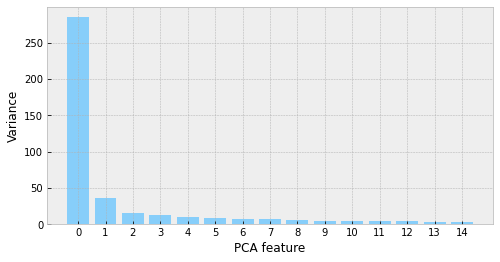

In [133]:
#check for optimal number of features
pca = PCA(random_state=123)
pca.fit(Data_norm)
features = range(pca.n_components_)

plt.figure(figsize=(8,4))
plt.bar(features[:15], pca.explained_variance_[:15], color='lightskyblue')
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features[:15])
plt.show()



In [134]:
def pca_transform(n_comp):
    pca = PCA(n_components=n_comp, random_state=123)
    global Data_reduced
    Data_reduced = pca.fit_transform(Data_norm)
    print('Shape of the new Data df: ' + str(Data_reduced.shape))

In [135]:
pca_transform(n_comp=3)
k_means(n_clust=2, data_frame=Data_reduced, true_labels=Labels)

Shape of the new Data df: (3609, 3)


orig_label,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
clust_label,,,,,,
0,680,622,668,0,0,6
1,1,1,0,603,493,535


inertia  homo    compl   v-meas   ARI     AMI     silhouette
349388   0.378   0.981   0.546   0.329   0.546    0.662


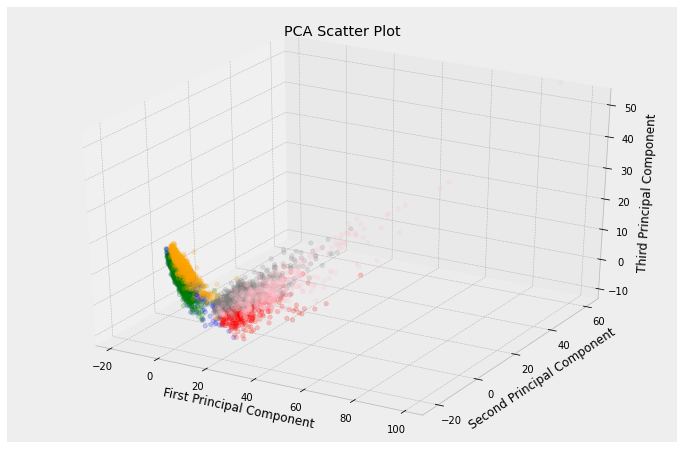

In [136]:
colors = ['green', 'blue', 'orange', 'gray', 'pink', 'red']
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(colors)):
    x = Data_reduced[:, 0][Labels == Labels_keys[i]]
    y = Data_reduced[:, 1][Labels == Labels_keys[i]]
    z = Data_reduced[:, 2][Labels == Labels_keys[i]]
    ax.scatter(xs=x, ys=y, zs=z, zdir='y', s=20, c=colors[i], alpha=0.2)

ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.set_title("PCA Scatter Plot")
plt.show()

In [137]:
pca_transform(n_comp=1)
k_means(n_clust=2, data_frame=Data_reduced, true_labels=Labels_binary)

Shape of the new Data df: (3609, 1)


orig_label,0,1
clust_label,,
0,1,1629
1,1971,8


inertia  homo    compl   v-meas   ARI     AMI     silhouette
168716   0.976   0.976   0.976   0.990   0.976    0.794


In [138]:
pca_transform(n_comp=2)
k_means(n_clust=2, data_frame=Data_reduced, true_labels=Labels_binary)

Shape of the new Data df: (3609, 2)


orig_label,0,1
clust_label,,
0,3,1631
1,1969,6


inertia  homo    compl   v-meas   ARI     AMI     silhouette
295754   0.975   0.975   0.975   0.990   0.975    0.694


In [160]:
from sklearn.manifold import TSNE
import seaborn as sns

In [161]:
data_1000 = Data_norm[0:1000,:]
labels_1000 = labels[0:10000]

model = TSNE(n_components = 2, random_state=0)
tsne_data = model.fit_transform(data_1000)

tsne_data = no.vstack((tsne_data, labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("a","b","c")
                       
sns.FacetGrid(tsne_df, hue = "label",size = 6).map(plt.scatter,"a","b").add_legend()
#plt.title('with perplexity = 50')
plt.show()

SyntaxError: invalid syntax (<ipython-input-161-22bf3694e683>, line 10)